In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# prompt: Using dataframe df: label encoder for categorical variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
# prompt: Using dataframe df: train test for charges

from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# prompt: lazypredict

!pip install lazypredict

from lazypredict.Supervised import LazyRegressor

# Initialize the LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Fit and predict
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the results
print(models)


 79%|███████▊  | 33/42 [00:02<00:00, 11.79it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:03<00:00, 11.36it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13346.089733
                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
GradientBoostingRegressor                    0.88       0.88    4351.11   
RandomForestRegressor                        0.86       0.87    4571.50   
LGBMRegressor                                0.86       0.86    4590.16   
HistGradientBoostingRegressor                0.86       0.86    4599.76   
XGBRegressor                                 0.85       0.85    4822.99   
ExtraTreesRegressor                          0.85       0.85    4825.67   
BaggingRegressor                             0.85       0

In [7]:
# prompt: scaling for charges

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the target variable (charges)
scaler.fit(df[['charges']])

# Transform the target variable
df['charges'] = scaler.transform(df[['charges']])

# Display the scaled dataframe
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,0.30
1,18,1,33.77,1,0,2,-0.95
2,28,1,33.00,3,0,2,-0.73
3,33,1,22.70,0,0,1,0.72
4,32,1,28.88,0,0,1,-0.78


In [8]:
reg1 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Fit and predict
models1, predictions = reg1.fit(X_train, X_test, y_train, y_test)

# Print the results
print(models1)

 76%|███████▌  | 32/42 [00:07<00:01,  5.35it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:08<00:00,  4.82it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13346.089733
                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
GradientBoostingRegressor                    0.88       0.88    4351.11   
RandomForestRegressor                        0.86       0.87    4571.50   
LGBMRegressor                                0.86       0.86    4590.16   
HistGradientBoostingRegressor                0.86       0.86    4599.76   
XGBRegressor                                 0.85       0.85    4822.99   
ExtraTreesRegressor                          0.85       0.85    4825.67   
BaggingRegressor                             0.85       0

In [17]:
# prompt: get predicts from best model with unscaled result

from sklearn.ensemble import GradientBoostingRegressor


# Fit the best model on the training data
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = best_model.predict(X_test)



In [19]:
# prompt: get input and give charges prediction

import pandas as pd
# Get input from the user
age = int(input("Enter age: "))
sex = input("Enter sex (male/female): ")
bmi = float(input("Enter bmi: "))
children = int(input("Enter number of children: "))
smoker = input("Enter smoker (yes/no): ")
region = input("Enter region (southwest/southeast/northwest/northeast): ")

# Preprocess the input
sex = 1 if sex.lower() == 'male' else 0
smoker = 1 if smoker.lower() == 'yes' else 0
if region.lower() == 'southwest':
  region = 0
elif region.lower() == 'southeast':
  region = 1
elif region.lower() == 'northwest':
  region = 2
else:
  region = 3

# Create a DataFrame with the input values
input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
                          columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Make prediction using the trained model
prediction = best_model.predict(input_data)



# Print the prediction
print("Predicted charges:", prediction[0])


Enter age: 22
Enter sex (male/female): male
Enter bmi: 20
Enter number of children: 1
Enter smoker (yes/no): no
Enter region (southwest/southeast/northwest/northeast): southeast
Predicted charges: 2657.004010684084


<Axes: xlabel='charges', ylabel='Count'>

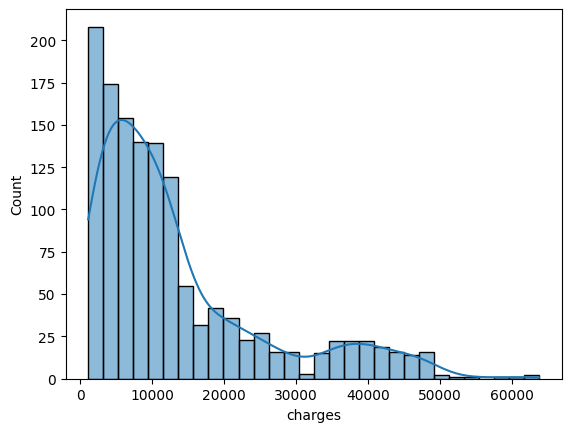

In [24]:
sns.histplot(data=df,x="charges",kde=True)

<Axes: >

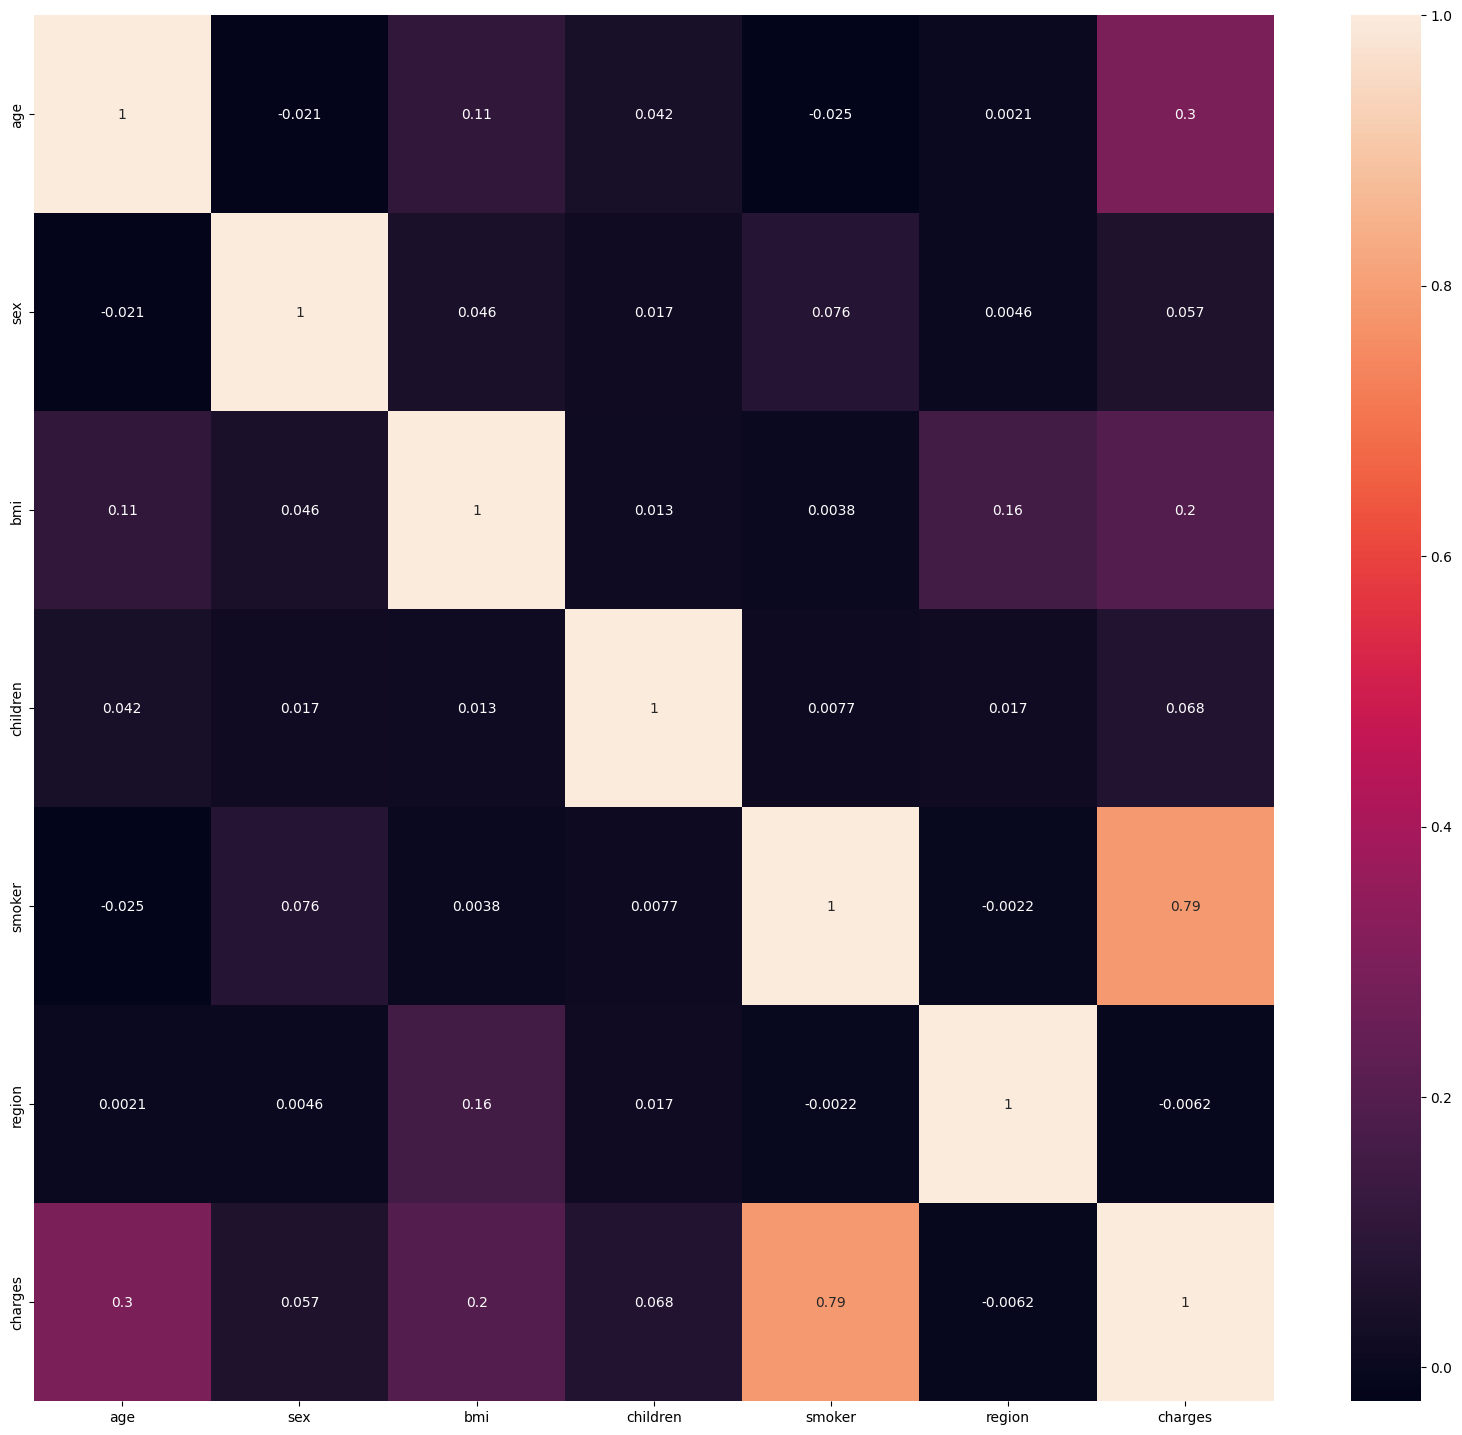

In [7]:
corr=df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot=True)

In [10]:
correlation_with_target = corr['charges']

# Sort the correlations in descending order and get the top 10 (excluding the target itself)
top_10_correlated_features = correlation_with_target.drop(['charges']).sort_values(ascending=False).head()

# Print the top 10 correlated features
print("Top 10 features most correlated with 'Amount_invested_monthly':")
print(top_10_correlated_features)

Top 10 features most correlated with 'Amount_invested_monthly':
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
Name: charges, dtype: float64


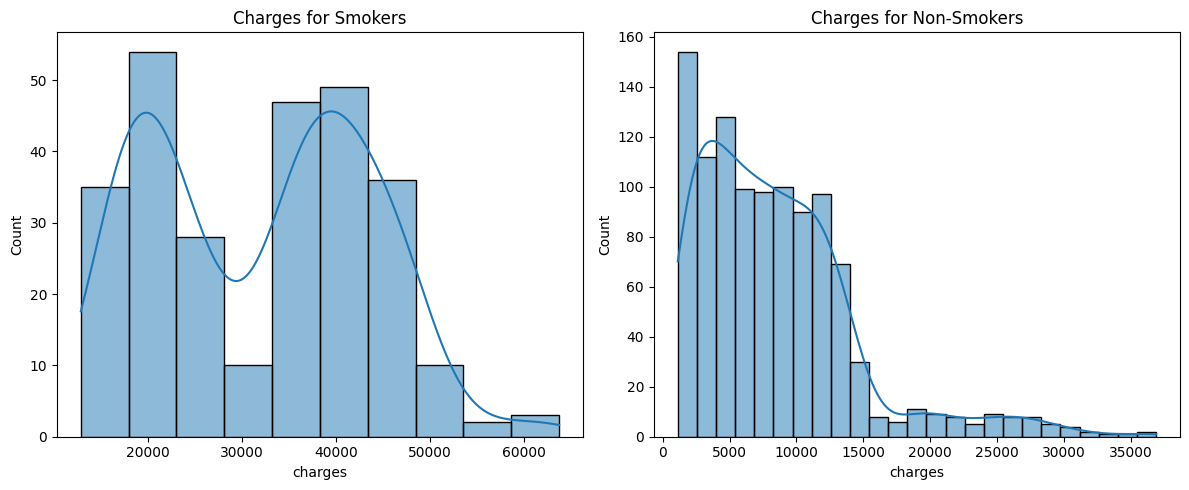

In [11]:
# prompt: sns histplot for charges if a smoker =1 or 0

import matplotlib.pyplot as plt
# Create subplots for smokers and non-smokers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Smokers
sns.histplot(data=df[df['smoker'] == 1], x="charges", kde=True, ax=axes[0])
axes[0].set_title("Charges for Smokers")

# Non-smokers
sns.histplot(data=df[df['smoker'] == 0], x="charges", kde=True, ax=axes[1])
axes[1].set_title("Charges for Non-Smokers")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

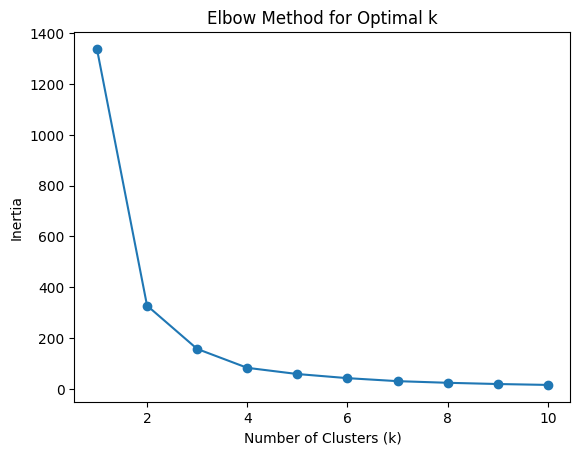

In [12]:
# prompt: elbow for how many groups based on charges

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the 'charges' column
charges = df[['charges']]

# Scale the data
scaler = StandardScaler()
scaled_charges = scaler.fit_transform(charges)

# Calculate the inertia (sum of squared distances to the nearest centroid) for different values of k
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_charges)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [14]:
# prompt: 3 clusters lazypredict classifier with pip install

!pip install lazypredict

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier

# Assuming your dataframe is named 'df' and you have already preprocessed it

# Separate features (X) and target variable (y)
# Assuming 'charges' is your target variable, and you want to classify it into 3 clusters
# You might need to adjust this based on your actual target variable and clustering logic
df['charges_cluster'] = pd.cut(df['charges'], bins=3, labels=[0, 1, 2])  # Create 3 clusters
X = df.drop(['charges', 'charges_cluster'], axis=1)
y = df['charges_cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the results
print(models)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 14%|█▍        | 4/29 [00:00<00:01, 13.39it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:00<00:00, 18.30it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 55%|█████▌    | 16/29 [00:00<00:00, 16.83it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible


 72%|███████▏  | 21/29 [00:01<00:00, 24.25it/s]

ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 83%|████████▎ | 24/29 [00:01<00:00, 17.58it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:01<00:00, 11.50it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score -0.192089
[LightGBM] [Info] Start training from score -1.991807
[LightGBM] [Info] Start training from score -3.261842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 12.93it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.94               0.87    None      0.93   
LinearSVC                          0.92               0.86    None      0.92   
LinearDiscriminantAnalysis         0.91               0.82    None      0.91   
SVC                                0.94               0.82    None      0.94   
DecisionTreeClassifier             0.91               0.82    None      0.91   
NearestCentroid                    0.89               0.82    None      0.89   
XGBClassifier                      0.93        

In [15]:
# prompt: run logistic regression and plot sctterplot with group use X = df[['age', 'bmi','smoker']]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select features
X = df[['age', 'bmi', 'smoker']]
y = df['charges_cluster']  # Assuming 'charges_cluster' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)



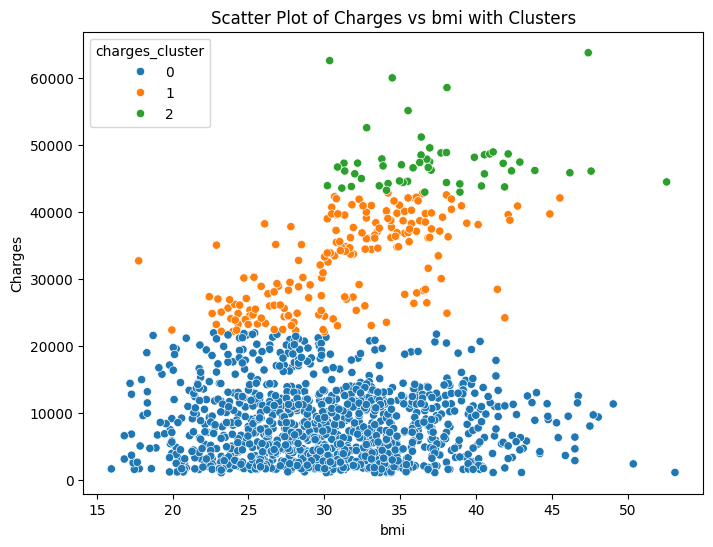

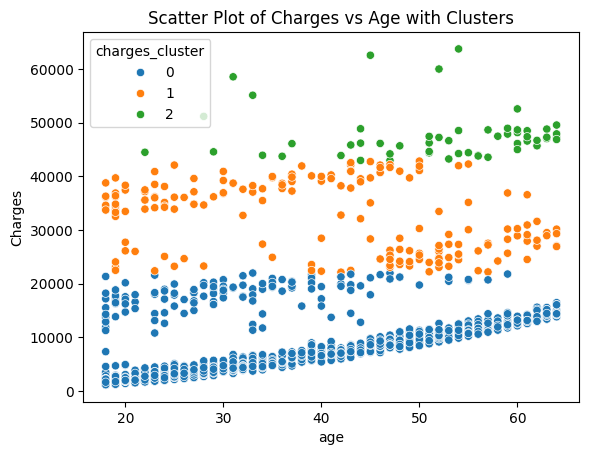

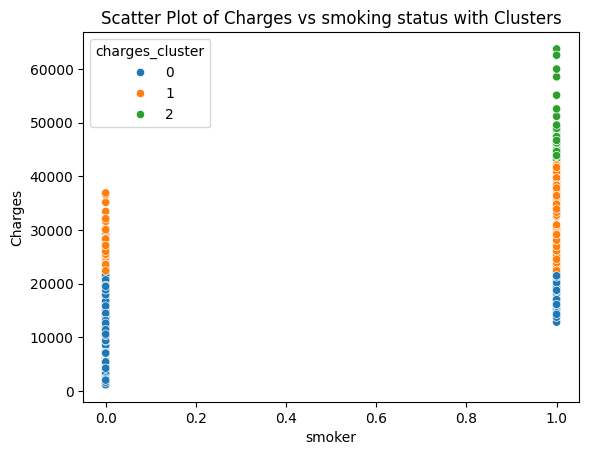

In [19]:
# prompt: scatterplot for charges with charge cluster

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='charges_cluster', data=df)
plt.title('Scatter Plot of Charges vs bmi with Clusters')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.show()


sns.scatterplot(x='age', y='charges', hue='charges_cluster', data=df)
plt.title('Scatter Plot of Charges vs Age with Clusters')
plt.xlabel('age')
plt.ylabel('Charges')
plt.show()

sns.scatterplot(x='smoker', y='charges', hue='charges_cluster', data=df)
plt.title('Scatter Plot of Charges vs smoking status with Clusters')
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.show()